In [17]:
%matplotlib inline

import cv2 
from matplotlib import pyplot as plt
import numpy as np
import math

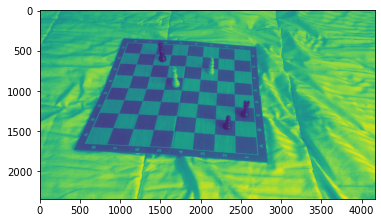

In [167]:
path = "/Users/rizo/Dropbox/chess/1.jpg"
src = cv2.imread(path)
src = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
plt.imshow(src)
plt.show()

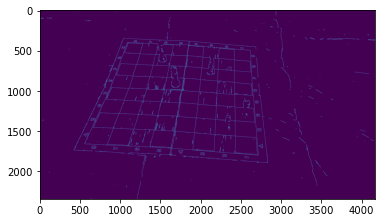

In [39]:
dst = cv2.Canny(src, 50, 200, None, 3)
plt.imshow(dst)
plt.show()

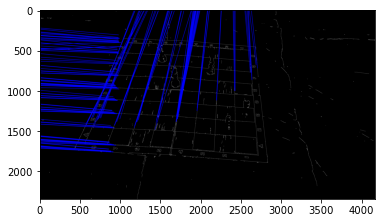

In [40]:
lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)
# Draw the lines
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

plt.imshow(cdst)

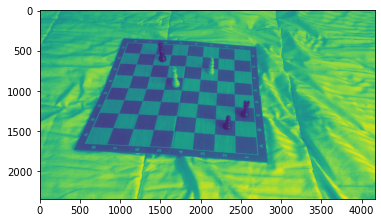

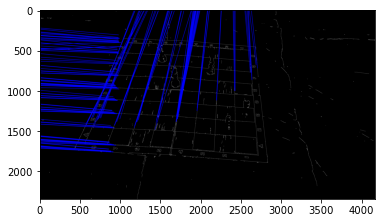

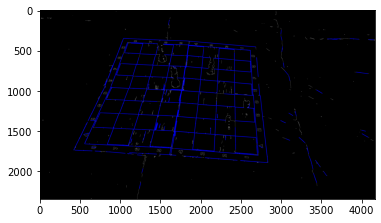

In [44]:
# Probabilistic Line Transform
linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

plt.imshow(src)
plt.show()
plt.imshow(cdst)
plt.show()
plt.imshow(cdstP, cmap=plt.get_cmap('viridis'))
plt.show()

In [42]:
plt.get_cmap('binary')

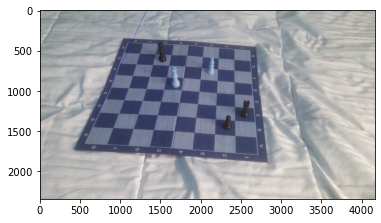

In [52]:
img = cv2.imread(path)
  
# Convert the img to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  
# Apply edge detection method on the image
edges = cv2.Canny(gray,50,150,apertureSize = 3)
  
# This returns an array of r and theta values
lines = cv2.HoughLines(edges,1,np.pi/180, 5)
  
# The below for loop runs till r and theta values 
# are in the range of the 2d array
for r,theta in lines[0]:
      
    # Stores the value of cos(theta) in a
    a = np.cos(theta)
  
    # Stores the value of sin(theta) in b
    b = np.sin(theta)
      
    # x0 stores the value rcos(theta)
    x0 = a*r
      
    # y0 stores the value rsin(theta)
    y0 = b*r
      
    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
    x1 = int(x0 + 1000*(-b))
      
    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
    y1 = int(y0 + 1000*(a))
  
    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
    x2 = int(x0 - 1000*(-b))
      
    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
    y2 = int(y0 - 1000*(a))
      
    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
    # (0,0,255) denotes the colour of the line to be 
    #drawn. In this case, it is red. 
    cv2.line(img,(x1,y1), (x2,y2), (0,0,255),2)
      
# All the changes made in the input image are finally
# written on a new image houghlines.jpg
plt.imshow(cv2.GaussianBlur(img, (7, 7), 2))

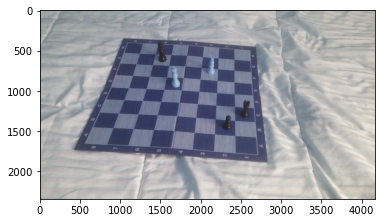

In [86]:
plt.imshow(img)

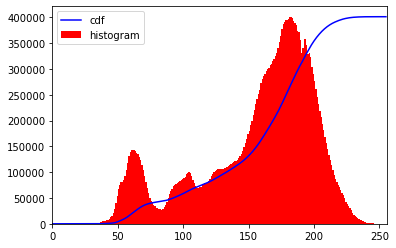

In [99]:
# CLAHE (contrast enhancement)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [100]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]

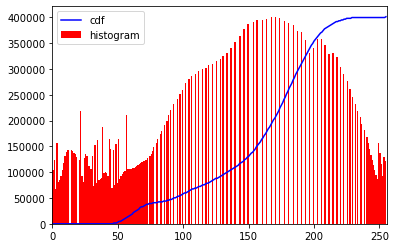

In [104]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

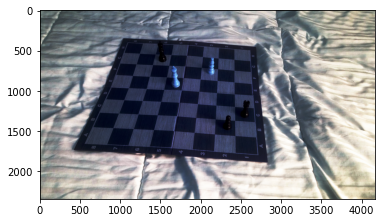

In [108]:
plt.imshow(img2)

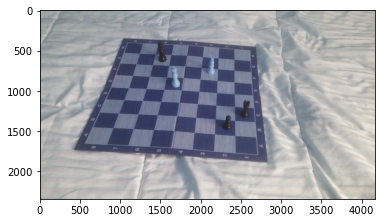

In [106]:
plt.imshow(img)

In [93]:
img = cv2.imread(path)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
plt.imshow(equ)

error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/histogram.cpp:3439: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'equalizeHist'


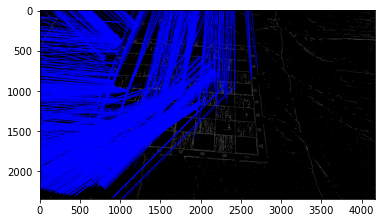

In [133]:
dst = cv2.Canny(equ, 150, 200, None, 3)

lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)
# Draw the lines
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

plt.imshow(cdst)

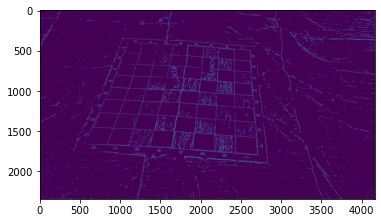

In [119]:
plt.imshow(dst)

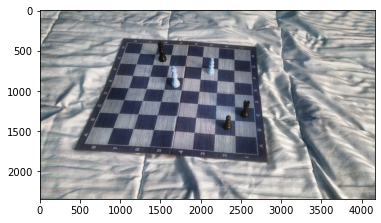

In [131]:


R, G, B = cv2.split(img)

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# cl1 = clahe.apply(img2)

output1_R = clahe.apply(R)
output1_G = clahe.apply(G)
output1_B = clahe.apply(B)




equ = cv2.merge((output1_R, output1_G, output1_B))
plt.imshow(equ)



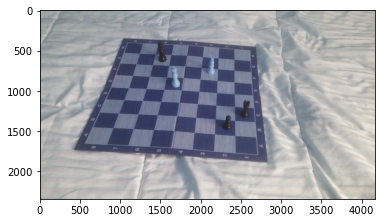

In [132]:
plt.imshow(img)

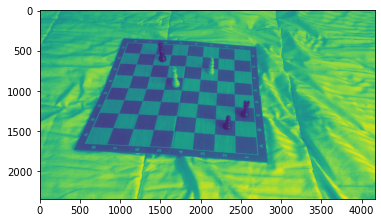

In [134]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

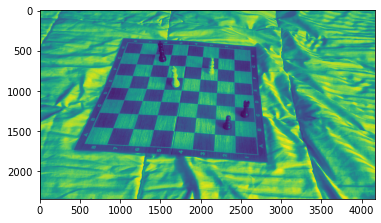

In [136]:
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(gray)

plt.imshow(cl1)

In [168]:
def detect_lines(img, threshold= 50):
    dst = cv2.Canny(img, threshold, 200, None, 3)
    lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

    cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
    cdstP = np.copy(cdst)
    # Draw the lines
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

    plt.imshow(cdst)

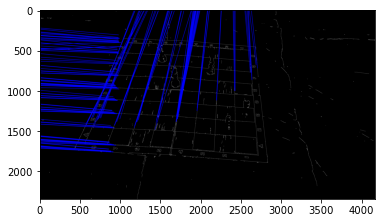

In [169]:
detect_lines(src)

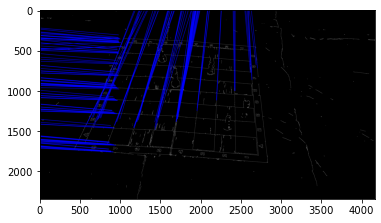

In [170]:
detect_lines(img)

In [183]:
def slid_canny(img, sigma=0.25):
	"""apply Canny edge detector (automatic thresh)"""
	v = np.median(img)
	img = cv2.medianBlur(img, 5)
	img = cv2.GaussianBlur(img, (7, 7), 2)
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	print(lower, upper)
	return cv2.Canny(img, lower, upper)

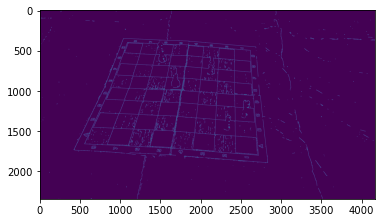

In [192]:
plt.imshow(cv2.Canny(src, 80, 150))

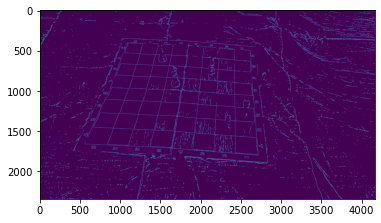

In [204]:
plt.imshow(cv2.Canny(enhance_contrast(src), 100, 200))

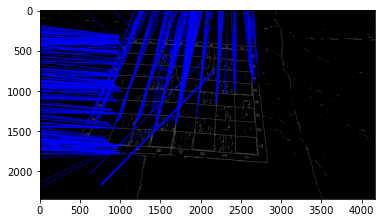

In [209]:
detect_lines(cv2.Canny(src, 80, 150))

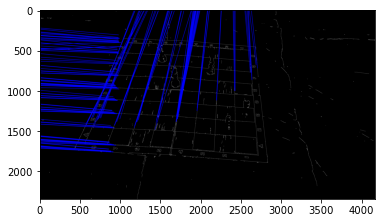

In [210]:
detect_lines(src)

In [207]:
def enhance_contrast(img):
    # CLAHE (contrast enhancement)
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()

    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    img2 = cdf[img]
    
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    img2 = cdf[img]
    hist,bins = np.histogram(img2.flatten(),256,[0,256])
    cdf_normalized = cdf * float(hist.max()) / cdf.max()

    return img2

def clahe(img):
    # create a CLAHE object (Arguments are optional).
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(img)
    return cl1

In [162]:

import debug, utils
NC_SLID_CLAHE = [[3,   (2, 6),    5], # @1
		         [3,   (6, 2),    5], # @2
				 [5,   (3, 3),    5], # @3
				 [0,   (0, 0),    0]] # EE
def pSLID(img, thresh=150):
	"""find all lines using different settings"""
	print(utils.call("pSLID(img)"))
	segments = []; i = 0
	for key, arr in enumerate(NC_SLID_CLAHE):
		tmp = slid_clahe(img, limit=arr[0], grid=arr[1], iters=arr[2])
		__segments = list(slid_detector(slid_canny(tmp), thresh))
		segments += __segments; i += 1
		print("FILTER: {} {} : {}".format(i, arr, len(__segments)))
		debug.image(slid_canny(tmp)).lines(__segments).save("pslid_F%d" % i)
	return segments


ValueError: not enough values to unpack (expected 2, got 0)

In [165]:

import debug
NC_SLID_CLAHE = [[3,   (2, 6),    5], # @1
		         [3,   (6, 2),    5], # @2
				 [5,   (3, 3),    5], # @3
				 [0,   (0, 0),    0]] # EE

def slid_canny(img, sigma=0.25):
	"""apply Canny edge detector (automatic thresh)"""
	v = np.median(img)
	img = cv2.medianBlur(img, 5)
	img = cv2.GaussianBlur(img, (7, 7), 2)
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	return cv2.Canny(img, lower, upper)


def slid_detector(img, alfa=150, beta=2):
	"""detect lines using Hough algorithm"""
	__lines, lines = [], cv2.HoughLinesP(img, rho=1, theta=np.pi/360*beta,
		threshold=40, minLineLength=50, maxLineGap=15) # [40, 40, 10]
	if lines is None: return []
	for line in np.reshape(lines, (-1, 4)):
		__lines += [[[int(line[0]), int(line[1])],
			         [int(line[2]), int(line[3])]]]
	return __lines

def slid_clahe(img, limit=2, grid=(3,3), iters=5):
	"""repair using CLAHE algorithm (adaptive histogram equalization)"""
	img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
	for i in range(iters):
		img = cv2.createCLAHE(clipLimit=limit, \
				tileGridSize=grid).apply(img)
	debug.image(img).save("slid_clahe_@1")
	if limit != 0:
		kernel = np.ones((10, 10), np.uint8)
		img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
		debug.image(img).save("slid_clahe_@2")
	return img

def pSLID(img, thresh=150):
	"""find all lines using different settings"""
	# print(utils.call("pSLID(img)"))
	segments = []; i = 0
	for key, arr in enumerate(NC_SLID_CLAHE):
		tmp = slid_clahe(img, limit=arr[0], grid=arr[1], iters=arr[2])
		__segments = list(slid_detector(slid_canny(tmp), thresh))
		segments += __segments; i += 1
		print("FILTER: {} {} : {}".format(i, arr, len(__segments)))
		debug.image(slid_canny(tmp)).lines(__segments).save("pslid_F%d" % i)
	return segments


In [166]:
pSLID(img)

FILTER: 1 [3, (2, 6), 5] : 126
FILTER: 2 [3, (6, 2), 5] : 142
FILTER: 3 [5, (3, 3), 5] : 219
FILTER: 4 [0, (0, 0), 0] : 0


[[[1922, 390], [2077, 404]],
 [[2014, 399], [2523, 443]],
 [[554, 1459], [586, 1394]],
 [[705, 1149], [752, 1053]],
 [[1761, 1149], [1877, 1159]],
 [[3818, 323], [4159, 340]],
 [[537, 129], [653, 133]],
 [[1625, 375], [1694, 377]],
 [[2737, 1062], [2758, 1258]],
 [[1245, 1294], [1435, 1303]],
 [[1172, 1459], [1204, 1357]],
 [[879, 141], [936, 144]],
 [[1909, 160], [1967, 162]],
 [[2784, 1490], [2801, 1635]],
 [[1077, 1119], [1271, 1129]],
 [[1651, 1312], [1938, 1337]],
 [[3524, 2001], [3563, 2052]],
 [[1419, 1482], [1473, 1265]],
 [[1964, 1168], [2133, 1180]],
 [[3828, 230], [3905, 233]],
 [[676, 133], [740, 136]],
 [[3461, 1914], [3520, 1992]],
 [[1224, 1289], [1272, 1140]],
 [[1234, 2208], [1250, 2139]],
 [[3911, 283], [4077, 289]],
 [[1421, 1485], [1604, 1495]],
 [[2699, 689], [2705, 755]],
 [[1546, 2207], [1610, 2200]],
 [[600, 1364], [669, 1222]],
 [[4048, 321], [4106, 325]],
 [[3559, 253], [3644, 255]],
 [[1920, 1516], [1941, 1341]],
 [[3809, 248], [3926, 254]],
 [[678, 1392], [7

In [215]:
all_points = []
def SLID(img, segments):
	# FIXME: zrobic 2 rodzaje haszowania (katy + pasy [blad - delta])
	# print(utils.call("SLID(img, segments)"))
	
	global all_points; all_points = []
	pregroup, group, hashmap, raw_lines = [[], []], {}, {}, []

	__cache = {}
	def __dis(a, b):
		idx = hash("__dis" + str(a) + str(b))
		if idx in __cache: return __cache[idx]
		__cache[idx] = np.linalg.norm(na(a)-na(b))
		return __cache[idx]

	X = {}
	def __fi(x):
		if x not in X: X[x] = 0;
		if (X[x] == x or X[x] == 0): X[x] = x
		else:                        X[x] = __fi(X[x])
		return X[x]
	def __un(a, b):
		ia, ib = __fi(a), __fi(b)
		X[ia] = ib; group[ib] |= group[ia]
		#group[ia] = set()
		#group[ia] = set()

	# shortest path // height
	nln = lambda l1, x, dx: \
		np.linalg.norm(np.cross(na(l1[1])-na(l1[0]),
								na(l1[0])-na(   x)))/dx

	def __similar(l1, l2):
		da, db = __dis(l1[0], l1[1]), __dis(l2[0], l2[1])
		# if da > db: l1, l2, da, db = l2, l1, db, da

		d1a, d2a = nln(l1, l2[0], da), nln(l1, l2[1], da)
		d1b, d2b = nln(l2, l1[0], db), nln(l2, l1[1], db)
	
		ds = 0.25 * (d1a + d1b + d2a + d2b) + 0.00001
		#print(da, db, abs(da-db))
		#print(int(da/ds), int(db/ds), "|", int(abs(da-db)), int(da+db),
		#		int(da+db)/(int(abs(da-db))+0.00001))
		alfa = 0.0625 * (da + db) #15
		# FIXME: roznica???
		#if d1 + d2 == 0: d1 += 0.00001 # [FIXME]: divide by 0
		t1 = (da/ds > alfa and db/ds > alfa)
		if not t1: return False # [FIXME]: dist???
		return True

	def __generate(a, b, n):
		points = []; t = 1/n
		for i in range(n):
			x = a[0] + (b[0]-a[0]) * (i * t)
			y = a[1] + (b[1]-a[1]) * (i * t)
			points += [[int(x), int(y)]]
		return points

	def __analyze(group):
		global all_points
		points = []
		for idx in group:
			points += __generate(*hashmap[idx], 10)
		_, radius = cv2.minEnclosingCircle(na(points)); w = radius * (math.pi/2)
		vx, vy, cx, cy = cv2.fitLine(na(points), cv2.DIST_L2, 0, 0.01, 0.01)
		# debug.color()
		all_points += points
		return [[int(cx-vx*w), int(cy-vy*w)], [int(cx+vx*w), int(cy+vy*w)]]

	for l in segments:
		h = hash(str(l))
		t1 = l[0][0] - l[1][0]
		t2 = l[0][1] - l[1][1]
		hashmap[h] = l; group[h] = set([h]); X[h] = h
		if abs(t1) < abs(t2): pregroup[0].append(l)
		else:                 pregroup[1].append(l)

	debug.image(img.shape) \
		.lines(pregroup[0], color=debug.color()) \
		.lines(pregroup[1], color=debug.color()) \
	.save("slid_pre_groups")

	for lines in pregroup:
		for i in range(len(lines)):
			l1 = lines[i]; h1 = hash(str(l1))
			#print(h1, __fi(h1))
			if (X[h1] != h1): continue
			#if (__fi(h1) != h1): continue
			for j in range(i+1, len(lines)):
				l2 = lines[j]; h2 = hash(str(l2))
				#if (__fi(h2) != h2): continue
				if (X[h2] != h2): continue
				#if (len(group[h2])==0): continue
				if not __similar(l1, l2): continue
				__un(h1, h2) # union & find
				# break # FIXME

	__d = debug.image(img.shape)
	for i in group:
		#if (__fi(i) != i): continue
		if (X[i] != i): continue
		#if len(group[i]) == 0: continue
		ls = [hashmap[h] for h in group[i]]
		__d.lines(ls, color=debug.color())
	__d.save("slid_all_groups")

	for i in group:
		#if (__fi(i) != i): continue
		if (X[i] != i): continue
		#if len(group[i]) == 0: continue
		#if (__fi(i) != i): continue
		raw_lines += [__analyze(group[i])]
	debug.image(img.shape).lines(raw_lines).save("slid_final")

	debug.image(img.shape)\
		.points(all_points, color=(0,255,0), size=2)\
	.lines(raw_lines).save("slid_final2")

	return raw_lines

In [216]:
SLID(src, [])

[]

In [217]:
segments = pSLID(src)

error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::SizePolicy::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::SizePolicy::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


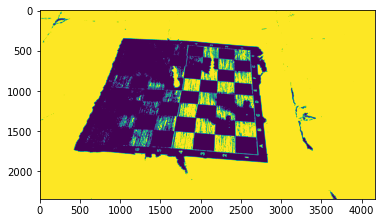

In [221]:
img = cv2.imread(path, 0)
blur = cv2.GaussianBlur(img,(5,5),0)
_, img_binary = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(img_binary)


In [223]:
delta 

NameError: name 'delta' is not defined

In [224]:
def f(a):
    def g(a):
        return a+1
    return g(a) + 1

In [227]:
f_g(5)

NameError: name 'f_g' is not defined

In [228]:
s1 = {"a", "b", "c"}
s2 = {"d", "e", "f"}

s1 |= s2

In [229]:
s1

{'a', 'b', 'c', 'd', 'e', 'f'}

In [263]:
def f(a):
    def g(b):
        return b+5
    return g(a+2)
g(3)

NameError: name 'g' is not defined

In [258]:
def slid_clahe(img, limit=2, grid=(3,3), iters=5):
	"""repair using CLAHE algorithm (adaptive histogram equalization)"""
	img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
	for i in range(iters):
		img = cv2.createCLAHE(clipLimit=limit, \
				tileGridSize=grid).apply(img)
	# plt.imshow(img)
	# plt.show()
	if limit != 0:
		kernel = np.ones((10, 10), np.uint8)
		img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
		# plt.imshow(img)
		# plt.show()
	return img

def pSLID(img, thresh=150):
	"""find all lines using different settings"""
	segments = []; i = 0
	for key, arr in enumerate(CLAHE_PARAMS):
		tmp = slid_clahe(img, limit=arr[0], grid=arr[1], iters=arr[2])
		curr_segments = list(slid_detector(slid_canny(tmp), thresh))
		segments += curr_segments; i += 1
		print("FILTER: {} {} : {}".format(i, arr, len(curr_segments)))
	return segments
CLAHE_PARAMS = [[3,   (2, 6),    5], # @1
		         [3,   (6, 2),    5], # @2
				 [5,   (3, 3),    5], # @3
				 [0,   (0, 0),    0]] # EE

In [261]:
class DisjointSet(object):

    def __init__(self):
        self.map = {}

    def find(self, x):
        if x not in X:
            self.map[x] = x
        if self.map[x] != x:
            self.map[x] = self.find(self.map[x])
        return self.map[x]
        
    
    def get(self, x):
        return self.map[x]
    
    def set(self, x, val):
        self.map[x] = val

In [300]:
arr = np.array

all_points = []
def SLID(img, segments):
    global all_points
    all_points = []

    pregroup, group, hashmap, raw_lines = [[], []], {}, {}, []

    dists = {}
    def dist(a, b):
        h = hash("dist"+str(a)+str(b))
        if h not in dists:
            dists[h] = np.linalg.norm(arr(a)-arr(b))
        return dists[h]

    parents = {}
    def find(x):
        if x not in parents:
            parents[x] = x
        if parents[x] != x:
            parents[x] = find(parents[x])
        return parents[x]
    
    def union(a, b):
        par_a = find(a)
        par_b = find(b)
        parents[par_a] = par_b
        group[par_b] |= group[par_a]
    
    def height(line, pt):
        v = np.cross(arr(line[1])-arr(line[0]), arr(pt)-arr(line[0]))
        # Using dist() to speed up distance look-up since the 2-norm 
        # is used many times
        return np.linalg.norm(v)/dist(line[1], line[0])
    
    def are_similar(l1, l2):
        '''See Sec.3.2.2 in Czyzewski et al.'''
        a = dist(l1[0], l1[1])
        b = dist(l2[0], l2[1])

        x1 = height(l2, l1[0])
        x2 = height(l2, l1[1])
        y1 = height(l1, l2[0])
        y2 = height(l1, l2[1])

        gamma = 0.25 * (x1+x2+y1+y2)

        img_width = 500
        img_height = 282
        p = 0.
        A = img_width*img_height
        w = np.pi/2 / np.sqrt(np.sqrt(A))
        t_delta = p*w

        delta = (a+b) * t_delta

        return (a/gamma > delta) and (b/gamma > delta)

    def generate_line(a, b, n):
        points = []
        for i in range(n):
            x = a[0] + (b[0] - a[0]) * (i/n)
            y = a[1] + (b[1] - a[1]) * (i/n)
            points += [[int(x), int(y)]]
        return points

    def analyze(group):
        global all_points
        points = []
        for idx in group:
            points += generate_line(*hashmap[idx], 10)
            print(idx)
        _, radius = cv2.minEnclosingCircle(arr(points))
        w = radius * np.pi / 2
        vx, vy, cx, cy = cv2.fitLine(arr(points), cv2.DIST_L2, 0, 0.01, 0.01)
        all_points += points
        return [[int(cx-vx*w), int(cy-vy*w)], [int(cx+vx*w), int(cy+vy*w)]]
    
    for l in segments:
        h = hash(str(l))
        # Initialize the line
        hashmap[h] = l
        group[h] = set([h])
        parents[h] = h

        wid = l[0][0] - l[1][0]
        hei = l[0][1] - l[1][1]

        # Divide lines into more horizontal vs more vertical 
        # to speed up comparison later
        if abs(wid) < abs(hei):
            pregroup[0].append(l)
        else:
            pregroup[1].append(l)

    for lines in pregroup:
        for i in range(len(lines)):
            l1 = lines[i]
            h1 = hash(str(l1))
            # We're looking for the root line of each disjoint set
            if parents[h1] != h1:
                continue
            for j in range(i+1, len(lines)):
                l2 = lines[j]
                h2 = hash(str(l2))
                if parents[h2] != h2:
                    continue
                if are_similar(l1, l2):
                    # Merge lines into a single disjoint set
                    union(h1, h2)
    
    for h in group:
        if parents[h] != h: 
            continue
        print(group[h])
        print(analyze(group[i]))
        raw_lines += [analyze(group[i])]
    
    return raw_lines

In [301]:
clahe = slid_clahe(img)
segments = pSLID(img)
lines = SLID(img, segments)

124 207
FILTER: 1 [3, (2, 6), 5] : 5
120 201
FILTER: 2 [3, (6, 2), 5] : 7
130 217
FILTER: 3 [5, (3, 3), 5] : 12
127 212
FILTER: 4 [0, (0, 0), 0] : 3
{-2397198306196075230, -7103499790005577717, -5033831159890447826, 6602237179984082667, 982225304448502094, 4438258473327514926, 3400994022542977232, -1329190282347860911, 8796094120708491131, 5034337716490487829, -9169511151598563460, 3563726858949550875, 6343454928856773308, 7137568073672748252}


KeyError: 12

In [270]:
img = cv2.imread("/Users/rizo/Dropbox/chess/1_scaled.jpeg")

In [292]:
clahe.shape

(282, 500)

In [276]:
width = 500
height = 282
p = 0.9
A = width*height
w = np.pi/2 / np.sqrt(np.sqrt(A))
t_delta = p*w
t_delta

0.0729554277771064

In [280]:
def generate_line(a, b, n):
    points = []
    for i in range(n):
        x = a[0] + (b[0] - a[0]) * (i/n)
        y = a[1] + (b[1] - a[1]) * (i/n)
        points += [[int(x), int(y)]]
    return points

generate_line([0,0], [5,5], 2)

[[0, 0], [2, 2]]

In [284]:
l = [[2,2,2],[3,3,3]]
arr = np.array
arr(l).shape

(2, 3)